In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import warnings
# warnings.filterwarnings("ignore")

In [3]:
# Create dataframe from local csv file
stroke_data_original =pd.read_csv('../Data/train_2v.csv')

# We will start by preview our data and determing what kind of problem we have. 

In [4]:
# Preview dataframe
stroke_data_original.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
# Get shape of dataframe
stroke_data_original.shape

(43400, 12)

In [6]:
# Get the number of indiviudals who had a stroke.
number_of_people_who_had_a_stroke = len(stroke_data_original[stroke_data_original["stroke"] == 1])
number_of_people_who_had_a_stroke

783

In [7]:
# Get the percentage of people who had a stroke
percentage_of_people_who_had_a_stroke = (number_of_people_who_had_a_stroke / len(stroke_data_original) ) * 100
percentage_of_people_who_had_a_stroke

1.804147465437788

 # After previewing our data, we see that we have a classification problem.  We will determine what the most appropriate features are, and use these to predict whether an individual will have a stroke.
 
 # We also notice that only about 1.8% of the individuals in our dataset had a stroke.  We will have to find a way to deal with imbalanced data.

# 1. Prework / Data Cleansing

In [8]:
# We do not want to work with unique identifiers.
# We will therefore drop the id column.

stroke_data_clean = stroke_data_original.drop(["id"], axis=1)
stroke_data_clean.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [9]:
# Check for NaN values
stroke_data_clean.isna().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [10]:
# Get number of unique values in smoking_status column
stroke_data_clean["smoking_status"].nunique()

3

In [11]:
# Get unique values of smoking_status column
stroke_data_clean["smoking_status"].unique()

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [12]:
# Get number of unique values in bmi column
stroke_data_clean["bmi"].nunique()

555

### We are working with NaN data.  We have a few options for what to do.

### Concerning the bmi values, we could:

1. Fill NaN values with the mean bmi value
1. Fill NaN values with the median bmi value
1. Fill NaN values with the mode bmi value

In [13]:
print(f"Mean: {stroke_data_clean['bmi'].mean()}")
print(f"Median: {stroke_data_clean['bmi'].median()}")
print(f"Mode: {stroke_data_clean.mode()['bmi'][0]}")

Mean: 28.605038390004545
Median: 27.7
Mode: 27.7


In [14]:
# The median bmi values is equal to the mode bmi value
# Fill NaN values in the "bmi" column with the median bmi
stroke_data_clean["bmi"].fillna(stroke_data_clean["bmi"].median(), inplace=True)

In [15]:
# Confirm no NaN values in the "bmi" column
stroke_data_clean.isna().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

### Concerning the smoking_status values, we could:

1. Assume these individuals were ashamed they smoke, and skipped this question.  We would therefore fill these values with "smokes"
2. Assume these individuals have never smoked and didn't think the question was important, and skipped it.  We would therefore fill these values with "never_smoked."

In [16]:
# Define two new dataframes based on the cleaned_stroke_data dataframe
stroke_data_clean_assume_smokes = stroke_data_clean_assume_never_smoked = stroke_data_clean

# Fill NaN values in the "smoking_status" column with either "smoked" or "never_smoked,"
# based on our aforementioned assumptions.
# stroke_data_clean_assume_smokes.fillna("smokes", inplace=True)
# stroke_data_clean_assume_never_smoked.fillna("never smoked", inplace=True)
stroke_data_clean_assume_smokes = stroke_data_clean_assume_smokes.fillna("smokes")
stroke_data_clean_assume_never_smoked = stroke_data_clean_assume_never_smoked.fillna("never smoked")

# cleaned_stroke_data_assume_smokes = cleaned_stroke_data["smoking_status"].fillna(value="smokes", inplace=True)
# cleaned_stroke_data_assume_never_smoked = cleaned_stroke_data["smoking_status"].fillna(value="never_smoked", inplace=True)

In [17]:
# Confirm NaN values properly filled
print("Original:")
print(stroke_data_clean.groupby("smoking_status")["smoking_status"].count())
print("\nAssume NaN corresponds to \"smokes\": ")
print(stroke_data_clean_assume_smokes.groupby("smoking_status")["smoking_status"].count())
print("\nAssume NaN correspondsto \"never smoked\": ")
print(stroke_data_clean_assume_never_smoked.groupby("smoking_status")["smoking_status"].count())

Original:
smoking_status
formerly smoked     7493
never smoked       16053
smokes              6562
Name: smoking_status, dtype: int64

Assume NaN corresponds to "smokes": 
smoking_status
formerly smoked     7493
never smoked       16053
smokes             19854
Name: smoking_status, dtype: int64

Assume NaN correspondsto "never smoked": 
smoking_status
formerly smoked     7493
never smoked       29345
smokes              6562
Name: smoking_status, dtype: int64


In [18]:
# Confirm no NaN values after filling in NaN data.
print("NaN counts for dataset assuming \"smokes\": ")
print(stroke_data_clean_assume_smokes.isna().sum())
print("\nNaN counts for dataset assuming \"never smoked\": ")
print(stroke_data_clean_assume_never_smoked.isna().sum())

NaN counts for dataset assuming "smokes": 
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

NaN counts for dataset assuming "never smoked": 
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## 2. Data Exploration

In [19]:
# Get the data type for each column
print("Assume smokes")
print(stroke_data_clean.dtypes)

Assume smokes
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [20]:
# Create list of possible categorical features
possible_categorical_features = ["gender",
                                 "hypertension",
                                 "heart_disease",
                                 "ever_married",
                                 "work_type",
                                 "Residence_type",
                                 "smoking_status"]

# Create list of possible numerical features
possible_numerical_features = ["age",
                               "avg_glucose_level",
                               "bmi"]

Text(0.5,1.05,'Count of indiviudals who had a stroke\n1 corresponds to "had a stroke"')

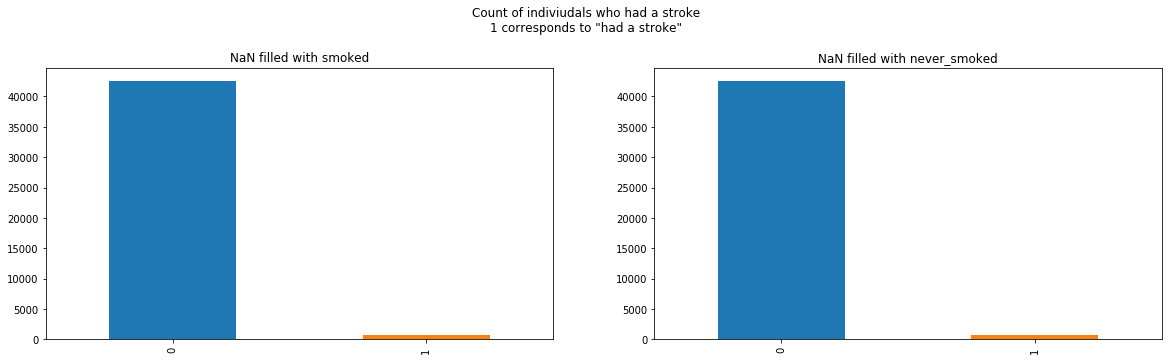

In [21]:
# Make a bar plot to see count of how many people did and did not have a stroke
# We have two datasets- one where we filled NaN values with "smokes,"
# and one where we filled NaN values with "never smoked"
# We will make subplots so we can compare both datasets.

plt.subplots(figsize=(20,5))

plt.subplot(1,2,1)
stroke_data_clean_assume_smokes.stroke.value_counts().plot(kind="bar")
plt.title("NaN filled with smoked")

plt.subplot(1,2,2)
stroke_data_clean_assume_never_smoked.stroke.value_counts().plot(kind="bar")
plt.title("NaN filled with never_smoked")

# Define an overall title for the entire graph and position it.
plt.suptitle("Count of indiviudals who had a stroke\n1 corresponds to \"had a stroke\"", x=0.5, y=1.05)

### Categorical Analysis
#### For each categorical feature, we will graph two bar plots- one showing for the entire dataset, and one for filtering the data to just those who had a stroke.  We will then examine the actual percentages that each group in each category makes up.

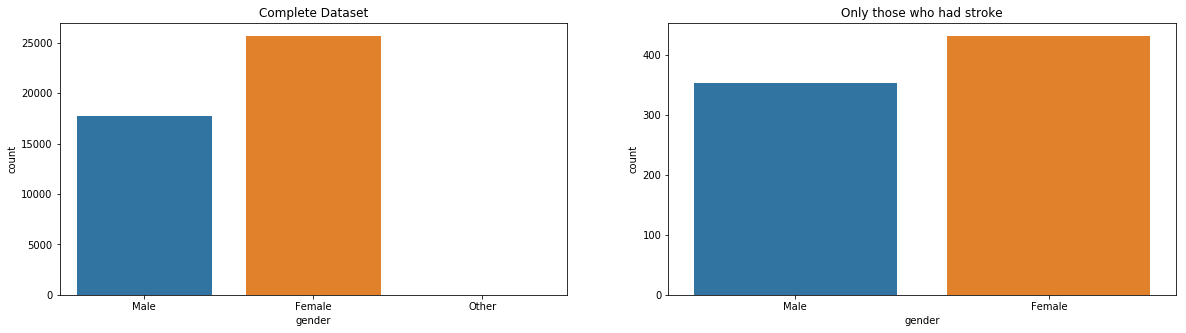

In [43]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(stroke_data_clean["gender"])
plt.title("Complete Dataset")

plt.subplot(1,2,2)
sns.countplot(stroke_data_clean[stroke_data_clean["stroke"] == 1]["gender"])
plt.title("Only those who had stroke")

plt.show()

In [44]:
print(stroke_data_clean["gender"].value_counts())
print(stroke_data_clean[stroke_data_clean["stroke"] == 1]["gender"].value_counts())

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64
Female    431
Male      352
Name: gender, dtype: int64


In [45]:
full_dataset_gender_percent_male = round((17724 / (25665+17724+11)) * 100, 2)
stroke_true_gender_percent_male = round((352 / (431+352)) * 100, 2)

print(f"Percent of people male (full dataset): {full_dataset_gender_percent_male}")
print(f"Percent of people male (only those with stroke): {stroke_true_gender_percent_male}")

Percent of people male (full dataset): 40.84
Percent of people male (only those with stroke): 44.96


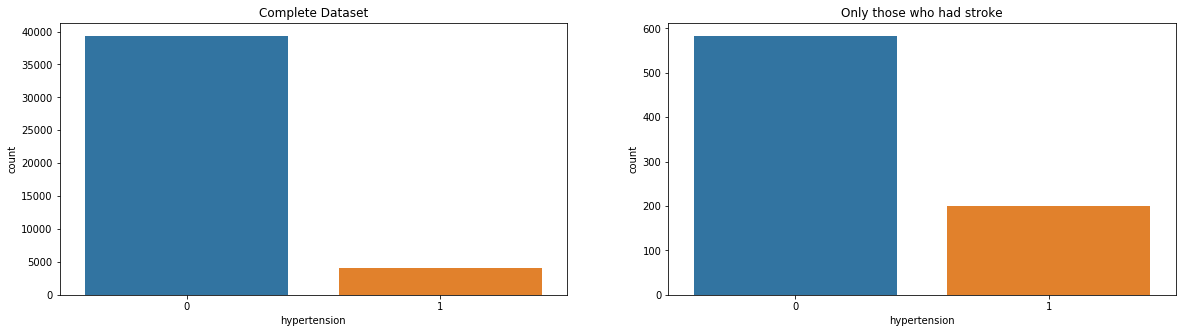

In [46]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(stroke_data_clean["hypertension"])
plt.title("Complete Dataset")

plt.subplot(1,2,2)
sns.countplot(stroke_data_clean[stroke_data_clean["stroke"] == 1]["hypertension"])
plt.title("Only those who had stroke")

plt.show()

In [47]:
print(stroke_data_clean["hypertension"].value_counts())
print(stroke_data_clean[stroke_data_clean["stroke"] == 1]["hypertension"].value_counts())

0    39339
1     4061
Name: hypertension, dtype: int64
0    583
1    200
Name: hypertension, dtype: int64


In [48]:
full_dataset_hypertension_percent_yes = round((4061 / (39339+4061)) * 100, 2)
stroke_true_hypertension_percent_yes = round((200 / (200+583)) * 100, 2)

print(f"Percent of people with hypertension (full dataset): {full_dataset_hypertension_percent_yes}")
print(f"Percent of people with hypertension (only those with stroke): {stroke_true_hypertension_percent_yes}")

Percent of people with hypertension (full dataset): 9.36
Percent of people with hypertension (only those with stroke): 25.54


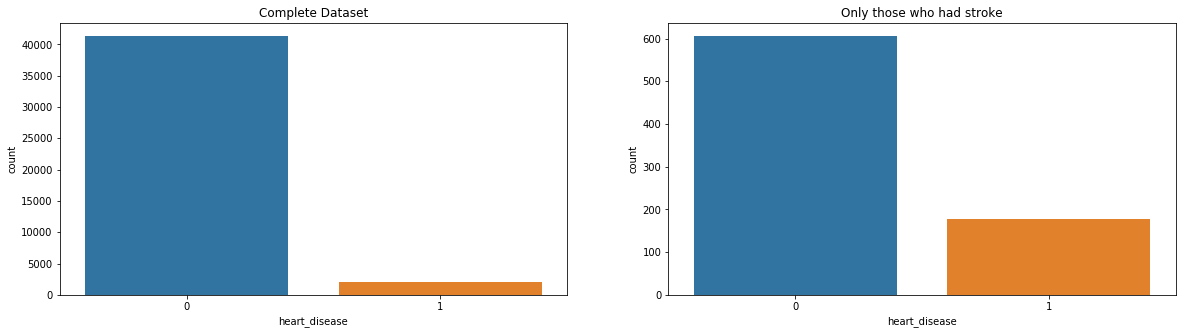

In [49]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(stroke_data_clean["heart_disease"])
plt.title("Complete Dataset")

plt.subplot(1,2,2)
sns.countplot(stroke_data_clean[stroke_data_clean["stroke"] == 1]["heart_disease"])
plt.title("Only those who had stroke")

plt.show()

In [50]:
print(stroke_data_clean["heart_disease"].value_counts())
print(stroke_data_clean[stroke_data_clean["stroke"] == 1]["heart_disease"].value_counts())

0    41338
1     2062
Name: heart_disease, dtype: int64
0    606
1    177
Name: heart_disease, dtype: int64


In [51]:
full_dataset_heart_disease_percent_yes = round((2062 / (41338+2062)) * 100, 2)
stroke_true_heart_disease_percent_yes = round((177 / (606+177)) * 100, 2)

print(f"Percent of people with heart disease (full dataset): {full_dataset_heart_disease_percent_yes}")
print(f"Percent of people with heart disease (only those with stroke): {stroke_true_heart_disease_percent_yes}")

Percent of people with heart disease (full dataset): 4.75
Percent of people with heart disease (only those with stroke): 22.61


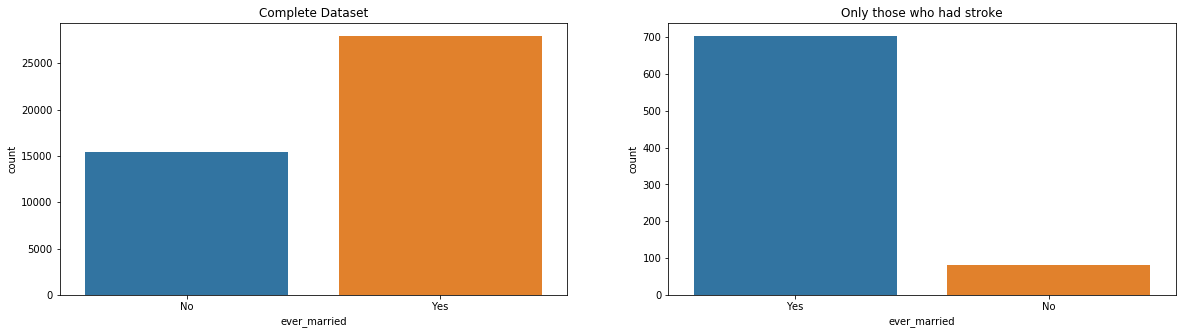

In [52]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(stroke_data_clean["ever_married"])
plt.title("Complete Dataset")

plt.subplot(1,2,2)
sns.countplot(stroke_data_clean[stroke_data_clean["stroke"] == 1]["ever_married"])
plt.title("Only those who had stroke")

plt.show()

In [53]:
print(stroke_data_clean["ever_married"].value_counts(), "\n")
print(stroke_data_clean[stroke_data_clean["stroke"] ==1]["ever_married"].value_counts())

Yes    27938
No     15462
Name: ever_married, dtype: int64 

Yes    703
No      80
Name: ever_married, dtype: int64


In [54]:
full_dataset_ever_married_percent_yes = round((27938 / (15462+27938)) * 100, 2)
stroke_true_ever_married_percent_yes = round((703 / (80+703)) * 100, 2)

print(f"Percent of people ever married (full dataset): {full_dataset_ever_married_percent_yes}")
print(f"Percent of people ever married (only those with stroke): {stroke_true_ever_married_percent_yes}")

Percent of people ever married (full dataset): 64.37
Percent of people ever married (only those with stroke): 89.78


Text(0.5,1,'Only those who had stroke')

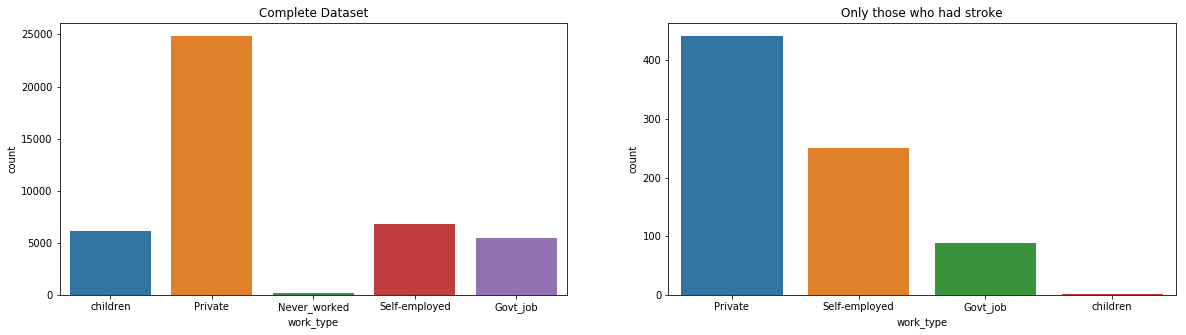

In [55]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(stroke_data_clean["work_type"])
plt.title("Complete Dataset")

plt.subplot(1,2,2)
sns.countplot(stroke_data_clean[stroke_data_clean["stroke"] == 1]["work_type"])
plt.title("Only those who had stroke")

In [56]:
print(stroke_data_clean["work_type"].value_counts(), "\n")
print(stroke_data_clean[stroke_data_clean["stroke"] == 1]["work_type"].value_counts())

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64 

Private          441
Self-employed    251
Govt_job          89
children           2
Name: work_type, dtype: int64


In [57]:
full_data_work_type_percent_private = round((24834 / (24834 + 6793 + 6156 + 5440 + 177)) * 100, 2)
full_data_work_type_percent_self_employed = round((6793 / (24834 + 6793 + 6156 + 5440 + 177)) * 100, 2)
full_data_work_type_percent_children = round((6156 / (24834 + 6793 + 6156 + 5440 + 177)) * 100, 2)
full_data_work_type_percent_govt_job = round((5440 / (24834 + 6793 + 6156 + 5440 + 177)) * 100, 2)

stroke_true_work_type_percent_private = round((441 / (441 + 251 + 89 + 2)) * 100, 2)
stroke_true_work_type_percent_self_employed = round((251 / (441 + 251 + 89 + 2)) * 100, 2)
stroke_true_work_type_percent_govt_job = round((89 / (441 + 251 + 89 + 2)) * 100, 2)
stroke_true_work_type_percent_children = round((2 / (441 + 251 + 89 + 2)) * 100, 2)

print(f"Percent of people work type private (full dataset): {full_data_work_type_percent_private}")
print(f"Percent of people work type private (only those with stroke): {stroke_true_work_type_percent_private}")
print()
print(f"Percent of people work type self employed (full dataset): {full_data_work_type_percent_self_employed}")
print(f"Percent of people work type self employed (only those with stroke): {stroke_true_work_type_percent_self_employed}")
print()
print(f"Percent of people work type children (full dataset): {full_data_work_type_percent_children}")
print(f"Percent of people work type children (only those with stroke): {stroke_true_work_type_percent_children}")
print()
print(f"Percent of people work type govt job (full dataset): {full_data_work_type_percent_govt_job}")
print(f"Percent of people work type govt job (only those with stroke): {stroke_true_work_type_percent_govt_job}")

Percent of people work type private (full dataset): 57.22
Percent of people work type private (only those with stroke): 56.32

Percent of people work type self employed (full dataset): 15.65
Percent of people work type self employed (only those with stroke): 32.06

Percent of people work type children (full dataset): 14.18
Percent of people work type children (only those with stroke): 0.26

Percent of people work type govt job (full dataset): 12.53
Percent of people work type govt job (only those with stroke): 11.37


Text(0.5,1,'Only those who had stroke')

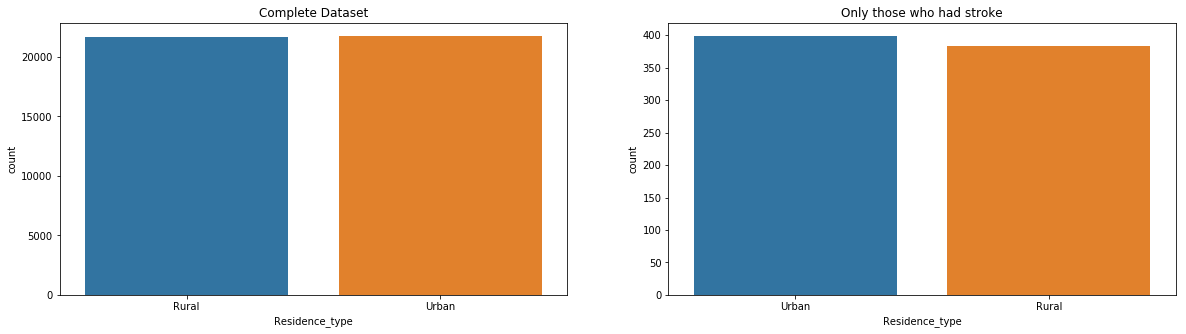

In [58]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(stroke_data_clean["Residence_type"])
plt.title("Complete Dataset")

plt.subplot(1,2,2)
sns.countplot(stroke_data_clean[stroke_data_clean["stroke"] == 1]["Residence_type"])
plt.title("Only those who had stroke")

In [59]:
print(stroke_data_clean["Residence_type"].value_counts(), "\n")
print(stroke_data_clean[stroke_data_clean["stroke"] == 1]["Residence_type"].value_counts())

Urban    21756
Rural    21644
Name: Residence_type, dtype: int64 

Urban    399
Rural    384
Name: Residence_type, dtype: int64


In [60]:
full_data_residence_type_percent_urban = round((21756 / (21756 + 21644)) * 100, 2)
full_data_residence_type_percent_rural = round((21644 / (21756 + 21644)) * 100, 2)
stroke_true_resident_type_percent_urban = round((399 / (399 + 384)) * 100, 2)
stroke_true_resident_type_percent_rural = round((384 / (399 + 384)) * 100, 2)

print(f"Percent of people residence type urban (full dataset): {full_data_residence_type_percent_urban}")
print(f"Percent of people residence type urban (only those with stroke): {stroke_true_resident_type_percent_urban}")
print()
print(f"Percent of people residence type rural (full dataset): {full_data_residence_type_percent_rural}")
print(f"Percent of people residence type rural (only those with stroke): {stroke_true_resident_type_percent_rural}")

Percent of people residence type urban (full dataset): 50.13
Percent of people residence type urban (only those with stroke): 50.96

Percent of people residence type rural (full dataset): 49.87
Percent of people residence type rural (only those with stroke): 49.04


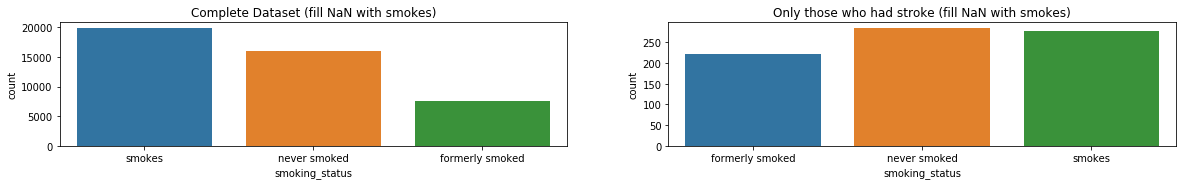

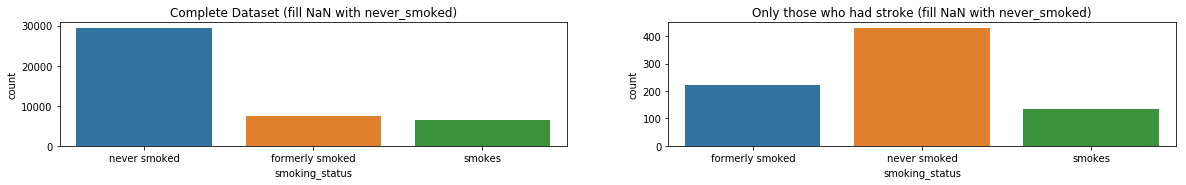

In [61]:
plt.figure(figsize=(20,5))
plt.subplot(2,2,1)
sns.countplot(stroke_data_clean_assume_smokes["smoking_status"])
plt.title("Complete Dataset (fill NaN with smokes)")

plt.subplot(2,2,2)
sns.countplot(stroke_data_clean_assume_smokes[stroke_data_clean_assume_smokes["stroke"] == 1]["smoking_status"])
plt.title("Only those who had stroke (fill NaN with smokes)")

plt.figure(figsize=(20,5))
plt.subplot(2,2,3)
sns.countplot(stroke_data_clean_assume_never_smoked["smoking_status"])
plt.title("Complete Dataset (fill NaN with never_smoked)")

plt.subplot(2,2,4)
sns.countplot(stroke_data_clean_assume_never_smoked[stroke_data_clean_assume_never_smoked["stroke"] == 1]["smoking_status"])
plt.title("Only those who had stroke (fill NaN with never_smoked)")

plt.show()

In [62]:
print("Assume NaN is \"smokes\"")
print(stroke_data_clean_assume_smokes["smoking_status"].value_counts(), "\n")
print(stroke_data_clean_assume_smokes[stroke_data_clean_assume_smokes["stroke"] == 1]["smoking_status"].value_counts())
print("\n", 100*"-", "\n")
print("Assume NaN is \"never smoked\"")
print(stroke_data_clean_assume_never_smoked["smoking_status"].value_counts(), "\n")
print(stroke_data_clean_assume_never_smoked[stroke_data_clean_assume_never_smoked["stroke"] == 1]["smoking_status"].value_counts())

Assume NaN is "smokes"
smokes             19854
never smoked       16053
formerly smoked     7493
Name: smoking_status, dtype: int64 

never smoked       284
smokes             278
formerly smoked    221
Name: smoking_status, dtype: int64

 ---------------------------------------------------------------------------------------------------- 

Assume NaN is "never smoked"
never smoked       29345
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64 

never smoked       429
formerly smoked    221
smokes             133
Name: smoking_status, dtype: int64


In [63]:
full_data_assume_smokes_smoking_status_percent_smokes = round((19854 / (19854 + 16053 + 7493)) * 100, 2)
full_data_assume_smokes_smoking_status_percent_never_smoked = round((16053 / (19854 + 16053 + 7493)) * 100, 2)
full_data_assume_smokes_smoking_status_percent_formerly_smoked = round((7493 / (19854 + 16053 + 7493)) * 100, 2)

stroke_true_assume_smokes_smoking_status_percent_smokes = round((278 / (284 + 278 + 221)) * 100, 2)
stroke_true_assume_smokes_smoking_status_percent_never_smoked = round((284 / (284 + 278 + 221)) * 100, 2)
stroke_true_assume_smokes_smoking_status_percent_formerly_smoked = round((221 / (284 + 278 + 221)) * 100, 2)

print("Fill NaN with \"smokes\"\n")
print(f"Percent of people smokes (full dataset): {full_data_assume_smokes_smoking_status_percent_smokes}")
print(f"Percent of people smokes (only those who with stroke): {stroke_true_assume_smokes_smoking_status_percent_smokes}")
print()

print(f"Percent of people never smoked (full dataset): {full_data_assume_smokes_smoking_status_percent_never_smoked}")
print(f"Percent of people never smoked (only those with stroke): {stroke_true_assume_smokes_smoking_status_percent_never_smoked}")
print()

print(f"Percent of people formerly smoked (full dataset): {full_data_assume_smokes_smoking_status_percent_formerly_smoked}")
print(f"Percent of people formerly smoked (only those with stroke): {stroke_true_assume_smokes_smoking_status_percent_formerly_smoked}")

print("\n", 100 * "-", "\n")

full_data_assume_never_smoked_smoking_status_percent_smokes = round((6562 / (29345 + 7493 + 6562)) * 100, 2)
full_data_assume_never_smoked_smoking_status_percent_never_smoked = round((6562 / (29345 + 7493 + 6562)) * 100, 2)
full_data_assume_never_smoked_smoking_status_percent_formerly_smoked = round((6562 / (29345 + 7493 + 6562)) * 100, 2)

stroke_true_assume_never_smoked_smoking_status_percent_smokes = round((133 / (429 + 221 + 133)) * 100, 2)
stroke_true_assume_never_smoked_smoking_status_percent_never_smoked = round((429 / (429 + 221 + 133)) * 100, 2)
stroke_true_assume_never_smoked_smoking_status_percent_formerly_smoked = round((221 / (429 + 221 + 133)) * 100, 2)

print("Fill NaN with \"never_smoked\"\n")
print(f"Percent of people smokes (full dataset): {full_data_assume_never_smoked_smoking_status_percent_smokes}")
print(f"Percent of people smokes (only those who with stroke): {stroke_true_assume_never_smoked_smoking_status_percent_smokes}")
print()

print(f"Percent of people never smoked (full dataset): {full_data_assume_never_smoked_smoking_status_percent_never_smoked}")
print(f"Percent of people never smoked (only those who with stroke): {stroke_true_assume_never_smoked_smoking_status_percent_never_smoked}")
print()

print(f"Percent of people formerly smoked (full dataset): {full_data_assume_never_smoked_smoking_status_percent_formerly_smoked}")
print(f"Percent of people formerly smoked (only those who with stroke): {stroke_true_assume_never_smoked_smoking_status_percent_formerly_smoked}")

Fill NaN with "smokes"

Percent of people smokes (full dataset): 45.75
Percent of people smokes (only those who with stroke): 35.5

Percent of people never smoked (full dataset): 36.99
Percent of people never smoked (only those with stroke): 36.27

Percent of people formerly smoked (full dataset): 17.26
Percent of people formerly smoked (only those with stroke): 28.22

 ---------------------------------------------------------------------------------------------------- 

Fill NaN with "never_smoked"

Percent of people smokes (full dataset): 15.12
Percent of people smokes (only those who with stroke): 16.99

Percent of people never smoked (full dataset): 15.12
Percent of people never smoked (only those who with stroke): 54.79

Percent of people formerly smoked (full dataset): 15.12
Percent of people formerly smoked (only those who with stroke): 28.22


#### Observations:

1. Despite making up only about 40.84% of the complete dataset, males makes up about 44.96% of those who had a stroke.
2. Despite making up only about 9.36% of the complete dataset, those with hypertension make up about 25.54% of those who had a stroke.
3. Despite making up only about 4.75% of the complete dataset, those with heart disease make up about 22.62% of those who had a stroke.
4. Despite making up only about 64.37% of the complete dataset, those who have ever been married make up about 89.78% of those who had a stroke.
5. Despite making up only about 15.65% of the complete dataset, those who are self employed make up about 32.06% of those who had a stroke.
6. Despite making up as much as about 14.18% of the complete dataset, those who work with children make up only about 0.26% of those who had a stroke.
7. People with an urban residence type make up about 50.13% of the complete dataset, and about 50.96% of those who had a stroke.

#### Concerning smoking_status:
If we assume that NaN values correspond to "smokes," the "smokes" group makes up the largest amount of people when looking at the entire dataset, and if we assume that NaN values correspond to "never smoked," the "never smoked" group makes up the largest amount of people when looking at the entire dataset.

However, when focusing on just the subset of people that had a stroke, if we assume that NaN values correspond to "smokes," the "never_smoked" group is larger than the "smokes" group by a thin margin; if we assume that NaN values correspond to "never_smoked," this group is larger than the "smokes" group by a wide margin.

Furthermore, if we assume NaN values correspond to "smokes," this group makes up the second-largest number of those who had stroke.  If we assume that NaN values correspond to "never_smoked," the "smokes" group makes up the smallest number of those who had a stroke, with the "formerly_smoked" group being the second-largest.  

Regardless of what we assume NaN values to correspond to, when focusing on just those who had a stroke, the largest group of people is those who have never smoked.  The only difference is how wide the margin is between this group and the "smokes" group.  Additionally, our assumption determines whether the "smokes" group will make up the second-largest, or the smallest group.

#### Next steps:
1. From observation 1, we do not consider gender important enough to be a feature.
2. From observtion 7, we do not consider residence_type important enough to be a feature. 
3. From observations 5 and 6, we wonder whether people who are self employed lack employer-provided health coverage and are thus more prone to having a stroke.  We also notice that people who work with children make up a a significantly small percentage of people who have a stroke, and wonder whether this property makes an individual less prone to having a stroke.  We consider condensing the groups in work_type down to "self employed," "children," and "other."  We consider the percent-changes in every other group to be insignificant.

### Numerical Analysis

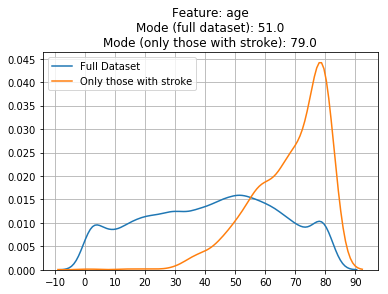

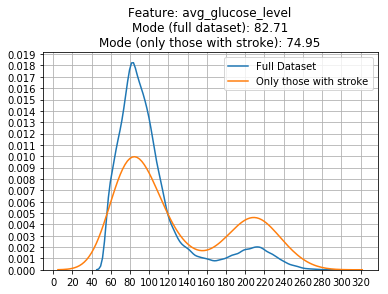

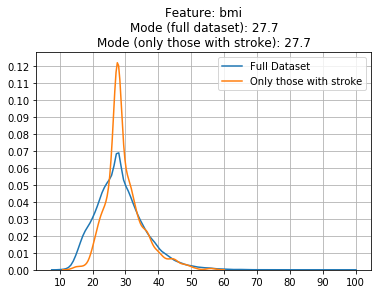

In [105]:
# Get kdeplot for each possible numerical feature
for possible_feature in possible_numerical_features:
    
    # Make two kdeplots,
    # one for the complete dataset,
    # and one for only those who had a stroke
    sns.kdeplot(stroke_data_clean[possible_feature])
    sns.kdeplot(stroke_data_clean[stroke_data_clean["stroke"] == 1][possible_feature])
    
    # Calculate the mode of the current feature,
    # (for both the complete dataset and the only-stroke-true subset)
    # To include in the plot title
    full_dataset_mode = round(stroke_data_clean.mode()[possible_feature][0], 2)
    stroke_true_mode = round(stroke_data_clean[stroke_data_clean["stroke"] == 1].mode()[possible_feature][0], 2)
    plt.title(f"Feature: {possible_feature}\nMode (full dataset): {full_dataset_mode}\nMode (only those with stroke): {stroke_true_mode}")
    
    # Find the minimum and maximum values from the current column
    # in order to calculate the range
    # Divide this range by a small number to set a new step-size for the x-axis
    column_max = stroke_data_clean[possible_feature].max()
    column_min = stroke_data_clean[possible_feature].min()
    column_range = column_max - column_min
    
    # Divide the column range by 10 for the plot showing avg_glucose_level,
    # otherwise the step-size would be too low and the x-axis would be unreadable.
    # We still want to divide the range by 5 to find the step-size for the other graphs,
    # as more x-ticks help us to more clearly see where the data lies.
    if possible_feature == "avg_glucose_level":
        plt.locator_params(nbins=column_range/10)
    else: 
        plt.locator_params(nbins=column_range/5)
        
    plt.legend(labels=["Full Dataset", "Only those with stroke"])
    
    # Include a grid to make reading exact points on the graph easier
    plt.grid()
    
    plt.show()

#### Observations:

1. When looking at the full dataset, most people appear to have an age close to 51, but when looking at only those who had a stroke, most people have an age close to 79.
2. When looking at the full dataset, most people appear to have an average glucose level (AVG) of around 82.71.  When looking at only those who had a stroke, most people have an age close to 74.95. In both cases, the frequency of AVGs drop sharply after this value, though there is a slight spike in frequency for individuals with an average glucose level just over 200. 
3. Whether you're looking at the complete dataset, or just those who had a stroke, most samples have an average BMI of somewhere around 27.7.

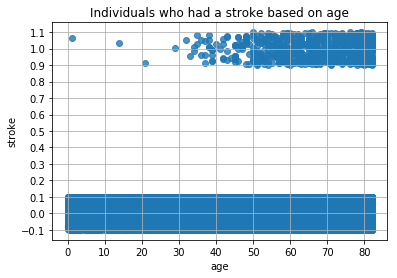

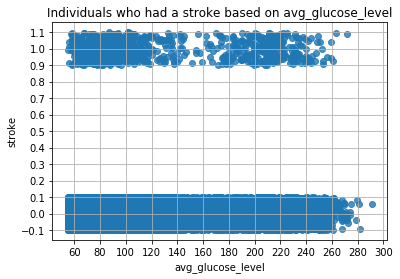

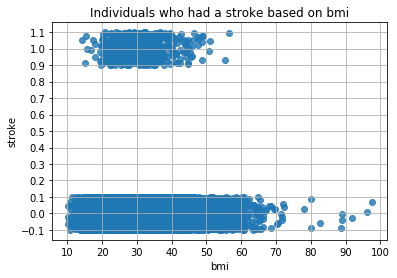

In [106]:
for possible_feature in possible_numerical_features:
    sns.regplot(x=possible_feature, y="stroke", data=stroke_data_clean, fit_reg=False, y_jitter=0.1)
    plt.title(f"Individuals who had a stroke based on {possible_feature}")
    
    # Find the minimum and maximum values from the current column
    # in order to calculate the range
    # Divide this range by a small number to set a new step-size for the x-axis
    column_max = stroke_data_clean[possible_feature].max()
    column_min = stroke_data_clean[possible_feature].min()
    column_range = column_max - column_min
    
    # Divide the column range by 10 for the plot showing avg_glucose_level,
    # otherwise the step-size would be too low and the x-axis would be unreadable.
    # We still want to divide the range by 5 to find the step-size for the other graphs,
    # as more x-ticks help us to more clearly see where the data lies.
    if possible_feature == "avg_glucose_level":
        plt.locator_params(nbins=column_range/10)
    else: 
        plt.locator_params(nbins=column_range/5)
    
    plt.grid()
    plt.show()

For bmi (stroke=0), count how many values are 1 standard deviation above/below the mean, 2 standard deviations above/below the mean, and 3 standard deviations above/below the mean.

Drop dara appropriately.

#### From the regplots above, we notice that indivuals who did not have a stroke could be any age, and have any average glucose level (AVG) or BMI.  However,

1. Individuals who did have a stroke were heavily concentrated in the higher age-group.  Very few indivduals under the age of 40 had a stroke, and the "concentration" really starts breaking up below age 50.
2. Individuals who did have a stroke are heavily concentrated at an AVG of less than about 120, or an AVG of greater than about 180 .  There seems to be a gap where much fewer indivduals with an AVG between these two values had a stroke.
3. Individudals who did have a stroke are heavily concentrated between a BMI of about 20 and 40, with a decent but smaller amount of people having BMIs exceeding 40.  Very few individuals with a BMI less than 20 had a stroke.

##### The strange gap of values for average glucose levels between about 120 and 180 concerns us.  We will breifly take a look at how these graphs would look, had we not dropped any data from the dataset.

In [ ]:
# Create dataframe from local csv file
original_stroke_data =pd.read_csv('../Data/train_2v.csv')

In [ ]:
# Get shape of dataframe
original_stroke_data.shape

In [ ]:
# Check for NaN values
original_stroke_data.isna().sum()

In [ ]:
del original_stroke_data["id"]
original_stroke_data.head()

### Categorical Analysis

In [ ]:
# Define a subplot so we can see each plot after data-cleansing compared to the original dataset
plt.subplots(figsize=(30,40))

# Define an iterator to place each sublplot in the right place
i = 1

for possible_feature in possible_categorical_features:
    
    plt.subplot(7,2,i)
    sns.countplot(possible_feature, data=stroke_data_clean)
    plt.title("After data-cleansing")
    
    plt.subplot(7,2,i+1)
    sns.countplot(possible_feature, data=stroke_data_original)
    plt.title("Original")
    
    # This plot is comprised of 3 rows and two columns.
    # When placing each subplot we must specify it's position on the full plot.
    # We place each subplot with the syntax ("row", "column", "position").
    # The first subplot (position 1) falls in the first column of the first row.
    # The next subplot (position 2) falls in the next column of the first row.
    # The next subplot (position 3) falls in the first column of the second row.
    # This pattern continues.
    # We have two columnns,
    # so the graph showing the data after data-cleansing will be in the first column (odd-numberd position),
    # and the graph showing the data from the original dataset will be in the second column (even-numbered position).
    # We then place graphs after data-cleansing with the syntax (2, 3, i),
    # and we place graphs showing original data with the syntax (2, 3, i+1).
    # We therefore increment our iterator by 2 to preserve its parity.
    i += 2

##### We can safely assume that dropping NaN data did not have a drastic effect on categorical data.

### Numerical Analysis

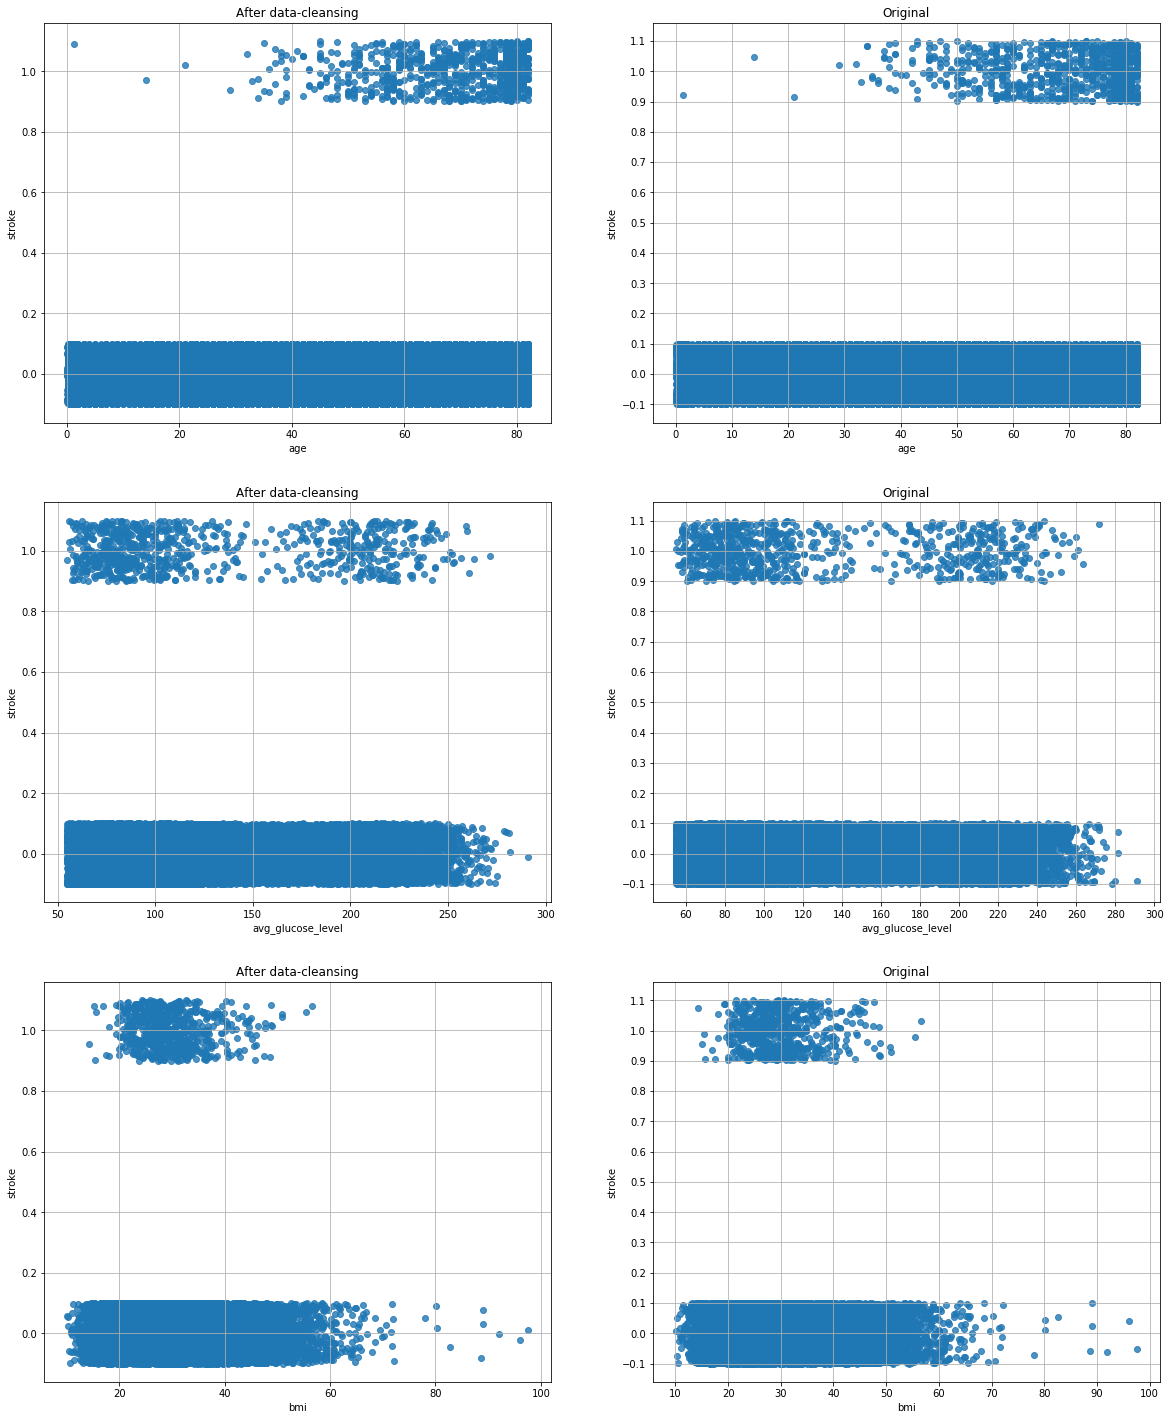

In [66]:
# Define a subplot so we can see each plot after data-cleansing compared to the original dataset
plt.subplots(figsize=(20,25))

# Define an iterator to place each sublplot in the right place
i = 1

for possible_feature in possible_numerical_features:
    
    plt.subplot(3,2,i)
    sns.regplot(x=possible_feature, y="stroke", data=stroke_data_clean, fit_reg=False, y_jitter=0.1)
    plt.title("After data-cleansing")
    plt.grid()
    
    plt.subplot(3, 2, i+1)
    sns.regplot(x=possible_feature, y="stroke", data=stroke_data_original, fit_reg=False, y_jitter=0.1)
    plt.title("Original")
    plt.grid()
    
    # Find the minimum and maximum values from the current column
    # in order to calculate the range
    # Divide this range by a small number to set a new step-size for the x-axis
    column_max = stroke_data_clean[possible_feature].max()
    column_min = stroke_data_clean[possible_feature].min()
    column_range = column_max - column_min
    
    # Divide the column range by 10 for the plot showing avg_glucose_level,
    # otherwise the step-size would be too low and the x-axis would be unreadable.
    # We still want to divide the range by 5 to find the step-size for the other graphs,
    # as more x-ticks help us to more clearly see where the data lies.
    if possible_feature == "avg_glucose_level":
        plt.locator_params(nbins=column_range/10)
    else: 
        plt.locator_params(nbins=column_range/5)
    
#     plt.grid()
#     plt.show()
    
    # This plot is comprised of 3 rows and two columns.
    # When placing each subplot we must specify it's position on the full plot.
    # We place each subplot with the syntax ("row", "column", "position").
    # The first subplot (position 1) falls in the first column of the first row.
    # The next subplot (position 2) falls in the next column of the first row.
    # The next subplot (position 3) falls in the first column of the second row.
    # This pattern continues.
    # We have two columnns,
    # so the graph showing the data after data-cleansing will be in the first column (odd-numberd position),
    # and the graph showing the data from the original dataset will be in the second column (even-numbered position).
    # We then place graphs after data-cleansing with the syntax (2, 3, i),
    # and we place graphs showing original data with the syntax (2, 3, i+1).
    # We therefore increment our iterator by 2 to preserve its parity.
    i += 2

##### We can safely assume that dropping NaN data did not have a drastic effect on numerical data.  The main thing we were looking for is whether dropping the data caused the strange gap between average glucose levels of 120 and 180.  This gap is also present in the original data.

### Further data analysis

In [ ]:
for possible_feature in possible_categorical_features:
    sns.violinplot(x=possible_feature, y="stroke", data=stroke_data_clean, hue="gender")
    plt.show()

##### As we are working with highly imbalanced data, violin plots turn out to be pretty useless.

## 3. Model Building

In [ ]:
# Transform data to binary encoded data
stroke_data_binary_encoded = pd.get_dummies(stroke_data, columns=["gender", "ever_married", "work_type", "Residence_type", "smoking_status"])
stroke_data_binary_encoded.head()

In [ ]:
# Create our features and label
X = stroke_data_binary_encoded.drop(["stroke"], axis=1)
y = stroke_data_binary_encoded["stroke"].values.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create scale for features and label
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Scale features and labels
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)